## ISYE 6740 - Assignment 1 - Regression

### Please leave the name of your teammate here if applicable.

In [1]:
##insert your name here

### 1. OLS Linear Regression

* In this question, we use a dataset of concrete to study OLS linear regression. For both training and testing data, the first 8 columns are features of concrete and the last column is "Concrete compressive strenth". We will train a linear regression model to predict the target variable of "Concrete compressive strenth".
* Please refer to the following package for OLS linear regression:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
* For this regression problem, we use Mean Square Error (MSE) as the metric to evaluate the performance of trained models. Given $n$ samples, let $\{Y_i\}_{i=1}^n$ be the observed values of the variable being predicted and $\{\hat{Y}_i\}_{i=1}^n$ be the predicted values. Then the MSE of the predictor is computed as 
<center>$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (Y_i-\hat{Y}_i)^2$.

#### a) Traing a linear regression model using the training set and report the training MSE.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

df = pd.read_excel("./Q1_train.xls")
X_train = df.iloc[:,0:-1].values
Y_train = df.iloc[:,-1].values
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)
predictions_train = model.predict(X_train)
mse_train = mean_squared_error(Y_train, predictions_train)
print(mse_train)


101.06509371850498


#### b) Evalaute the learnt model using the testing set. Please report the testing MSE.

In [2]:
df_test = pd.read_excel("./Q1_test.xls")
X_test = df_test.iloc[:,0:8].values
Y_test = df_test.iloc[:,8].values
predictions_train = model.predict(X_test)
mse_test = mean_squared_error(Y_test, predictions_train)
# print(model.coef_)
print(model.intercept_)
print(mse_test)

5.111198817050521
130.57162483135338


#### c) Which of the MSEs on the training and testing sets is larger? Why?

The test set is larger, because the trained model may overfit and trained set may not cover the test data domain.

#### d) If we have infintely many training data points, can we make MSE (on the testing set) of our model as small as possible? Why?

This fist depends on how the traning dataset's distribution can cover the testing dataset's distribution, i.e. if the data points are the same points. Second, whether the model is appropriate for this prediction is a question, if the model selected is not applicable, like the linear prediction model might not be applicable to predict data who owns non-linear relation between features and label. Then, error still exsits. 

#### e) Use gradient descent to train a linear regression model. Recall that the objective function is 
<center>$\hat{w}=\mathop{\arg\min}_{w}\frac{1}{n} \sum_{i=1}^n (Y_i-X_i^\top w)^2$</center>
    
Here, set max_iteration = 1e5, stepsize = 3e-7, and stopping criterion = 1e-5. Please compute the gradient of the parameters and then follow the algorithm outline to finish your codes. 

#### Please plot the optimization error $\text{Opt. Err.} = \|\hat{w}-w^{(k)}\|_2^2$ vs iteration, where $\hat{w}$ is the coefficient vector (including intercept) learnt in a) and $w^{(k)}$ is the coefficient vector at the $k$-th iteration of gradient descent.

In [4]:
### Insert Code Here
import matplotlib as plt
X_train = df.iloc[:,0:-1].values
gradient_norm = 1
iteration = 0
stepsize = 3e-7
coef = model.coef_
coef = list(coef)
coef.insert(0,model.intercept_)
coef = np.array(coef)
X_axis = []
Y_axis = []
X_test = np.c_[np.ones(X_test.shape[0]),X_test]
X_train = np.c_[np.ones(X_train.shape[0]),X_train]
weight = np.zeros(X_train.shape[1])
print(weight.shape, coef.shape)
print(X_train.shape)
while( gradient_norm>= 1e-05 and iteration < 1e5):
    predictions_train = X_train.dot(weight)
    pred_error = Y_train - predictions_train
    gradient = -X_train.T.dot(pred_error)/ len(Y_train)
    weight -= gradient * stepsize
    opt_error = mean_squared_error(weight, coef) * 9
    # a = opt_error = np.linalg.norm(weight-coef,2)**2
    gradient_norm = np.linalg.norm(gradient, 2)
    iteration+=1
    X_axis.append(iteration)
    Y_axis.append(opt_error)
    predictions_test = X_test.dot(weight)
    if iteration%5000 ==0:
        mse_train = mean_squared_error(Y_train, predictions_train)
        mse_test = mean_squared_error(Y_test, predictions_test)
            # print(f"At {iteration} th iteration, the test_set_error is {mse_test}, the train set error is {mse_train}")
        # print(iteration)
        # print(gradient_norm)
# print(a)
print(weight)
print("\n", coef)
print(gradient_norm)
# initialize parameter vetor w.
# loop t=1:max_iter:
#    update w using gradient (Hint: compute X'X and X'Y).
#    Compute the testing MSE of parameter w.
#    Stop the iteration if the 2-norm of gradient is smaller than 1e-5.

(9,) (9,)
(800, 9)
[-2.36806353e-05  1.19717450e-01  1.04583438e-01  8.92610147e-02
 -2.03113279e-01  9.95920215e-02  8.14201071e-03  1.70587399e-02
  1.09783059e-01]

 [ 5.11119882  0.11474118  0.09854176  0.08039343 -0.1961972   0.21584407
  0.00677105  0.01266422  0.10922624]
1.689757357021999


#### f) Please plot the testing MSE vs iteration.

[-2.36806353e-05  1.19717450e-01  1.04583438e-01  8.92610147e-02
 -2.03113279e-01  9.95920215e-02  8.14201071e-03  1.70587399e-02
  1.09783059e-01]

 [ 5.11119882  0.11474118  0.09854176  0.08039343 -0.1961972   0.21584407
  0.00677105  0.01266422  0.10922624]


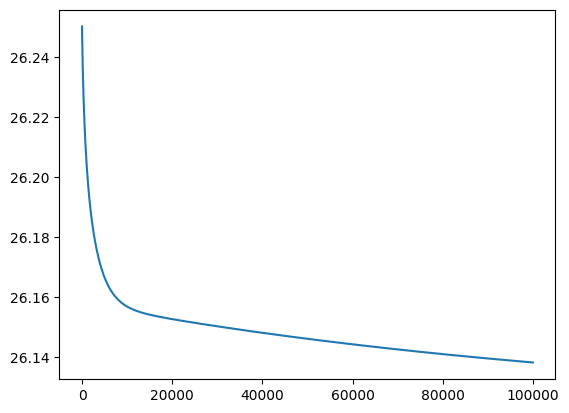

In [5]:
### Insert Code Here
import matplotlib.pyplot as plt
print(weight)
print("\n", coef)
plt.plot(X_axis, Y_axis)
plt.show()

#### g) Given what you have observed in e) and f), what can you say about the number of iterations we need from a prediction perspective? Why?

### 2. Robust Regression

* Please find the Concrete dataset for Q2.
* This dataset is very similiar that of Q1, but the training set is contaminated.
* Please refer to the following package for quantile regression:
https://scikit-learn.org/stable/auto_examples/linear_model/plot_quantile_regression.html
* Note that the quantile regression is identical to LAD regression when using 50% quantile. 

#### a) Train a linear regression model on the training dataset using OLS, and report the testing MSE.

In [6]:
df = pd.read_excel("./Q2_train.xls")
X_train = df.iloc[:,0:-1].values
Y_train = df.iloc[:,-1].values
df = pd.read_excel("./Q2_test.xls")
X_test = df.iloc[:,0:-1].values
Y_test = df.iloc[:,-1].values
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)
predictions_train = model.predict(X_test)
mse_test = mean_squared_error(Y_test, predictions_train)
print(mse_test)



173.65733448483687


#### b) Train a linear regression model on the training dataset using LAD (set regularization constant alpha =1), and report the testing MSE.

In [7]:
from sklearn.linear_model import QuantileRegressor

model = QuantileRegressor(quantile= 0.5, alpha=1, solver = 'highs')
y_pred = model.fit(X_train, Y_train).predict(X_test)
mse_test = mean_squared_error(Y_test, y_pred)
print(mse_test)

137.7399386816783


#### c) Does LAD outperform OLS? Why?

Yes, because the outlier has enhanced the MSE error in OLS method.

### 3. Linear Classification

* In this question, we use a dataset about spam emails to study linear classifiers. For both training and testing data, the first 57 columns are different features of emails, such as the frequency of occurence of a particular word, and the last column shows whether an email is spam (1 for spam). We will train linear classifiers to predict if a given email is spam.
* Please refer to the following package for different linear classifiers.\

Linear Discriminant Analysis Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

Gaussian Naive Bayes Classifier:
https://scikit-learn.org/stable/modules/naive_bayes.html

Logistic Regression Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* For this classification problem, we use classification error as the metric to evaluate the performance of trained models. Given $n$ samples, let $\{Y_i\}_{i=1}^n$ be the observed labels of the variable being predicted and $\{\hat{Y}_i\}_{i=1}^n$ be the predicted labels. Then the classification error of the predictor is computed as
<center>$\text{Classification Error} = \frac{1}{n} \sum_{i=1}^n \mathbb{1}(Y_i \neq \hat{Y}_i).$


#### a) Train a Linear Discriminant Analysis Classifier using the training set and report the classification error on the testing set.

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
train_df = pd.read_csv("./Q3_train.csv")
test_df = pd.read_csv("./Q3_test.csv")

X_train = train_df.iloc[:,:-1].values
Y_train = train_df.iloc[:,-1].values
X_test = test_df.iloc[:,:-1].values
Y_test = test_df.iloc[:,-1].values

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
predictions_test = clf.predict(X_test)
sum =0
for i,j in enumerate(predictions_test):
    if predictions_test[i] != Y_test[i]:
        sum+=1
print(sum/len(Y_test))


0.09940249864204237


#### b) Repeat the above using Gaussian Naive Bayes Classifier.

In [9]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
predictions_test = gnb.fit(X_train, Y_train).predict(X_test)
sum =0
for i,j in enumerate(predictions_test):
    if predictions_test[i] != Y_test[i]:
        sum+=1
print(sum/len(Y_test))


0.19174361759913092


#### c) Repeat the above using Logistic Regression Classifier.

In [10]:
from sklearn.linear_model import LogisticRegression
predictions_test = LogisticRegression(random_state=0,max_iter=100000).fit(X_train, Y_train).predict(X_test)
sum =0
for i,j in enumerate(predictions_test):
    if predictions_test[i] != Y_test[i]:
        sum+=1
print(sum/len(Y_test))

0.07495926127104835


#### d) Please compare the classification errors of Linear Discriminant Analysis and Guassian Naive Bayes Classifier, and provide an explanation for the results.

The linear discriminant analysis' error is lower, this is because Gaussian Naive Bayes assumes the input classes variables are independent, however, it is not true in terms of the frequency of words appeared in the text.

#### e) Please compare the classification errors of Linear Discriminant Analysis and Logistic Regression, and provide an explanation for the results.

The logistic regression perfroms better because LR do not depend on assumption on feature distribution whereas LDA assumes the features in each class they have equal covariance matrices across classes.

### 4. K Nearest Neighbor Classifier

* In this question, we use a dataset about diabetes to study K Nearest Neighbor Classifier. For both training and testing data, the first 8 columns are different diagnostic measurements of patients, such as Blppd Pressure and BMI, and the last column shows whether a patient has diabetes (1 for diabetes). We will train a K Nearest Neighbor Classifier to predict if a person has diabetes.
* Please refer to the following package for K Nearest Neighbor Classifier:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### a) Train a K Nearest Neighbor Classifier with Euclidean Distance (Try K=3,6,9,12,15) to fit provided the diabetes training set , and predict the responses of the testing set. Plot the classification error vs K.

[0.3110236220472441, 0.2677165354330709, 0.2440944881889764, 0.25196850393700787, 0.2637795275590551]


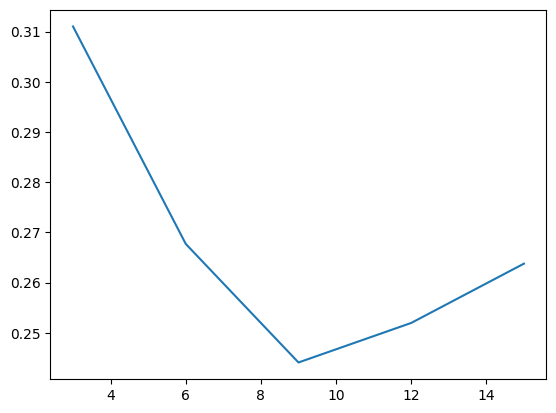

In [11]:
from sklearn.neighbors import KNeighborsClassifier
train_df = pd.read_csv("./Q4_train.csv")
test_df = pd.read_csv("./Q4_test.csv")

X_train = train_df.iloc[:,:-1].values
Y_train = train_df.iloc[:,-1].values
X_test = test_df.iloc[:,:-1].values
Y_test = test_df.iloc[:,-1].values
lis = [3,6,9,12,15]
loss = []
for k,j in enumerate(lis):
    neigh = KNeighborsClassifier(n_neighbors=lis[k])
    neigh.fit(X_train, Y_train)
    predictions_test = neigh.predict(X_test)
    sum =0
    for i,j in enumerate(predictions_test):
        if predictions_test[i] != Y_test[i]:
            sum+=1
    loss.append(sum/len(Y_test))
    
plt.plot(lis,loss)
print(loss)


#### b) Repeat the above using a K Nearest Neighbor Classifier with Manhattan Distance ($L_1$-distance).

[0.33858267716535434, 0.25984251968503935, 0.2637795275590551, 0.2440944881889764, 0.2559055118110236]


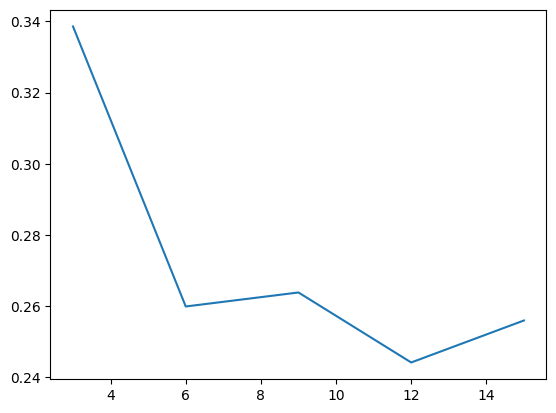

In [12]:
loss = []
for k,j in enumerate(lis):
    neigh = KNeighborsClassifier(n_neighbors=lis[k],p=1)
    neigh.fit(X_train, Y_train)
    predictions_test = neigh.predict(X_test)
    sum =0
    for i,j in enumerate(predictions_test):
        if predictions_test[i] != Y_test[i]:
            sum+=1
    loss.append(sum/len(Y_test))
    
plt.plot(lis,loss)
print(loss)

#### c) Repeat the above using a Logistic Regression Classifier, and compare its testing error with those of the K Nearest Neighbor Classifiers. Do you observe any difference? Why?

In [13]:
from sklearn.linear_model import LogisticRegression
predictions_test = LogisticRegression(random_state=0,max_iter=1000).fit(X_train, Y_train).predict(X_test)
sum =0
for i,j in enumerate(predictions_test):
    if predictions_test[i] != Y_test[i]:
        sum+=1
print(sum/len(Y_test))

0.2204724409448819


The Logisticc Regression Classifier outperform the KNN classier. This might be at high dimension feature space, the training data for KNN might be too sparse, which make KNN less reliable. Meanwhile, the features both have uniform weight in prediction(through L1 or L2 distance)  and some feature like the DiabetesPedigreeFunction which ranges 0-1, might play minor role in distance computing.